In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

In [2]:
class Cluster:
    
    def __init__(self, d):
        self.d = d
        self.pi = np.random.rand()
        self.mu = np.random.rand(self.d) * 10
        self.cov = make_spd_matrix(self.d, self.d)
    
    def compute_resp(self, X):
        self.resp = self.pi * multivariate_normal(mean=self.mu, cov=self.cov).pdf(X)
        return self.resp

In [3]:
cluster = Cluster(5)

In [4]:
X = np.random.rand(10, 5)
cluster.compute_resp(X)

array([8.10466849e-114, 3.57063353e-110, 1.63368302e-120, 1.02263438e-110,
       2.73902923e-118, 2.09595400e-122, 1.86355130e-118, 9.77027630e-117,
       1.58474647e-103, 5.76233730e-110])

In [5]:
class GMM:
    def __init__(self, k, d):
        self.k = k
        self.d = d
        
        self.clusters = [Cluster(self.d) for _ in range(self.k)]
        
    def do_estep(self, X):
        resp_normalizer = 0
        
        for cluster in self.clusters:
            resp_normalizer += cluster.compute_resp(X)
        
        for cluster in self.clusters:
            cluster.resp /= resp_normalizer
    
    def do_mstep(self, X):
        for cluster in self.clusters:
            cluster_resp = cluster.resp
            cluster.mu = np.sum(X.T * cluster_resp, axis=1) / sum(cluster.resp)
            cluster.cov = ((X - cluster.mu).T * cluster_resp).dot((X - cluster.mu)) / sum(cluster.resp)
            cluster.pi = sum(cluster.resp) / len(X)

In [6]:
gmm = GMM(3, 2)

In [7]:
X1 = np.random.multivariate_normal(mean=[1, 1], cov=[[1, 0], [0, 1]], size=(100))
X2 = np.random.multivariate_normal(mean=[10, 1], cov=[[1, 0], [0, 1]], size=(100))
X3 = np.random.multivariate_normal(mean=[10, 19], cov=[[1, 0], [0, 1]], size=(100))
X = np.concatenate([X1, X2, X3])

In [11]:
for _ in range(100):
    gmm.do_estep(X)
    gmm.do_mstep(X)

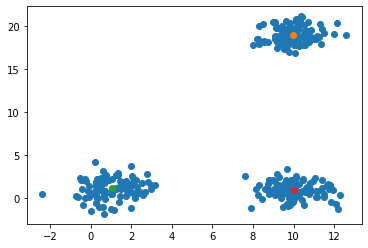

In [12]:
plt.scatter([x for x, _ in X], [y for _, y in X])

for cluster in gmm.clusters:
    plt.scatter([cluster.mu[0]], [cluster.mu[1]])

In [10]:
for cluster in gmm.clusters:
    print([cluster.mu[0]], [cluster.mu[1]])

[9.946808201047293] [19.023709784755134]
[3.270042414322039] [0.8928176666735761]
[10.121977834209806] [1.1788296779118703]
